### Load and Preprocess Data

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()
X = data.data
true_labels = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Feature Selection Before Clustering

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Fit a Random Forest classifier to determine feature importance
clf = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, true_labels)

# Select the most important features
selector = SelectFromModel(clf, threshold="median", prefit=True)
X_selected = selector.transform(X_scaled)

print(f"Selected Features Shape: {X_selected.shape}")


Selected Features Shape: (569, 15)


### Dimensionality Reduction (PCA)

In [15]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.68498545 0.12414273]


### Apply Clustering Algorithms

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_pca)

# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_clusters = hierarchical.fit_predict(X_pca)


### Visualize Clusters

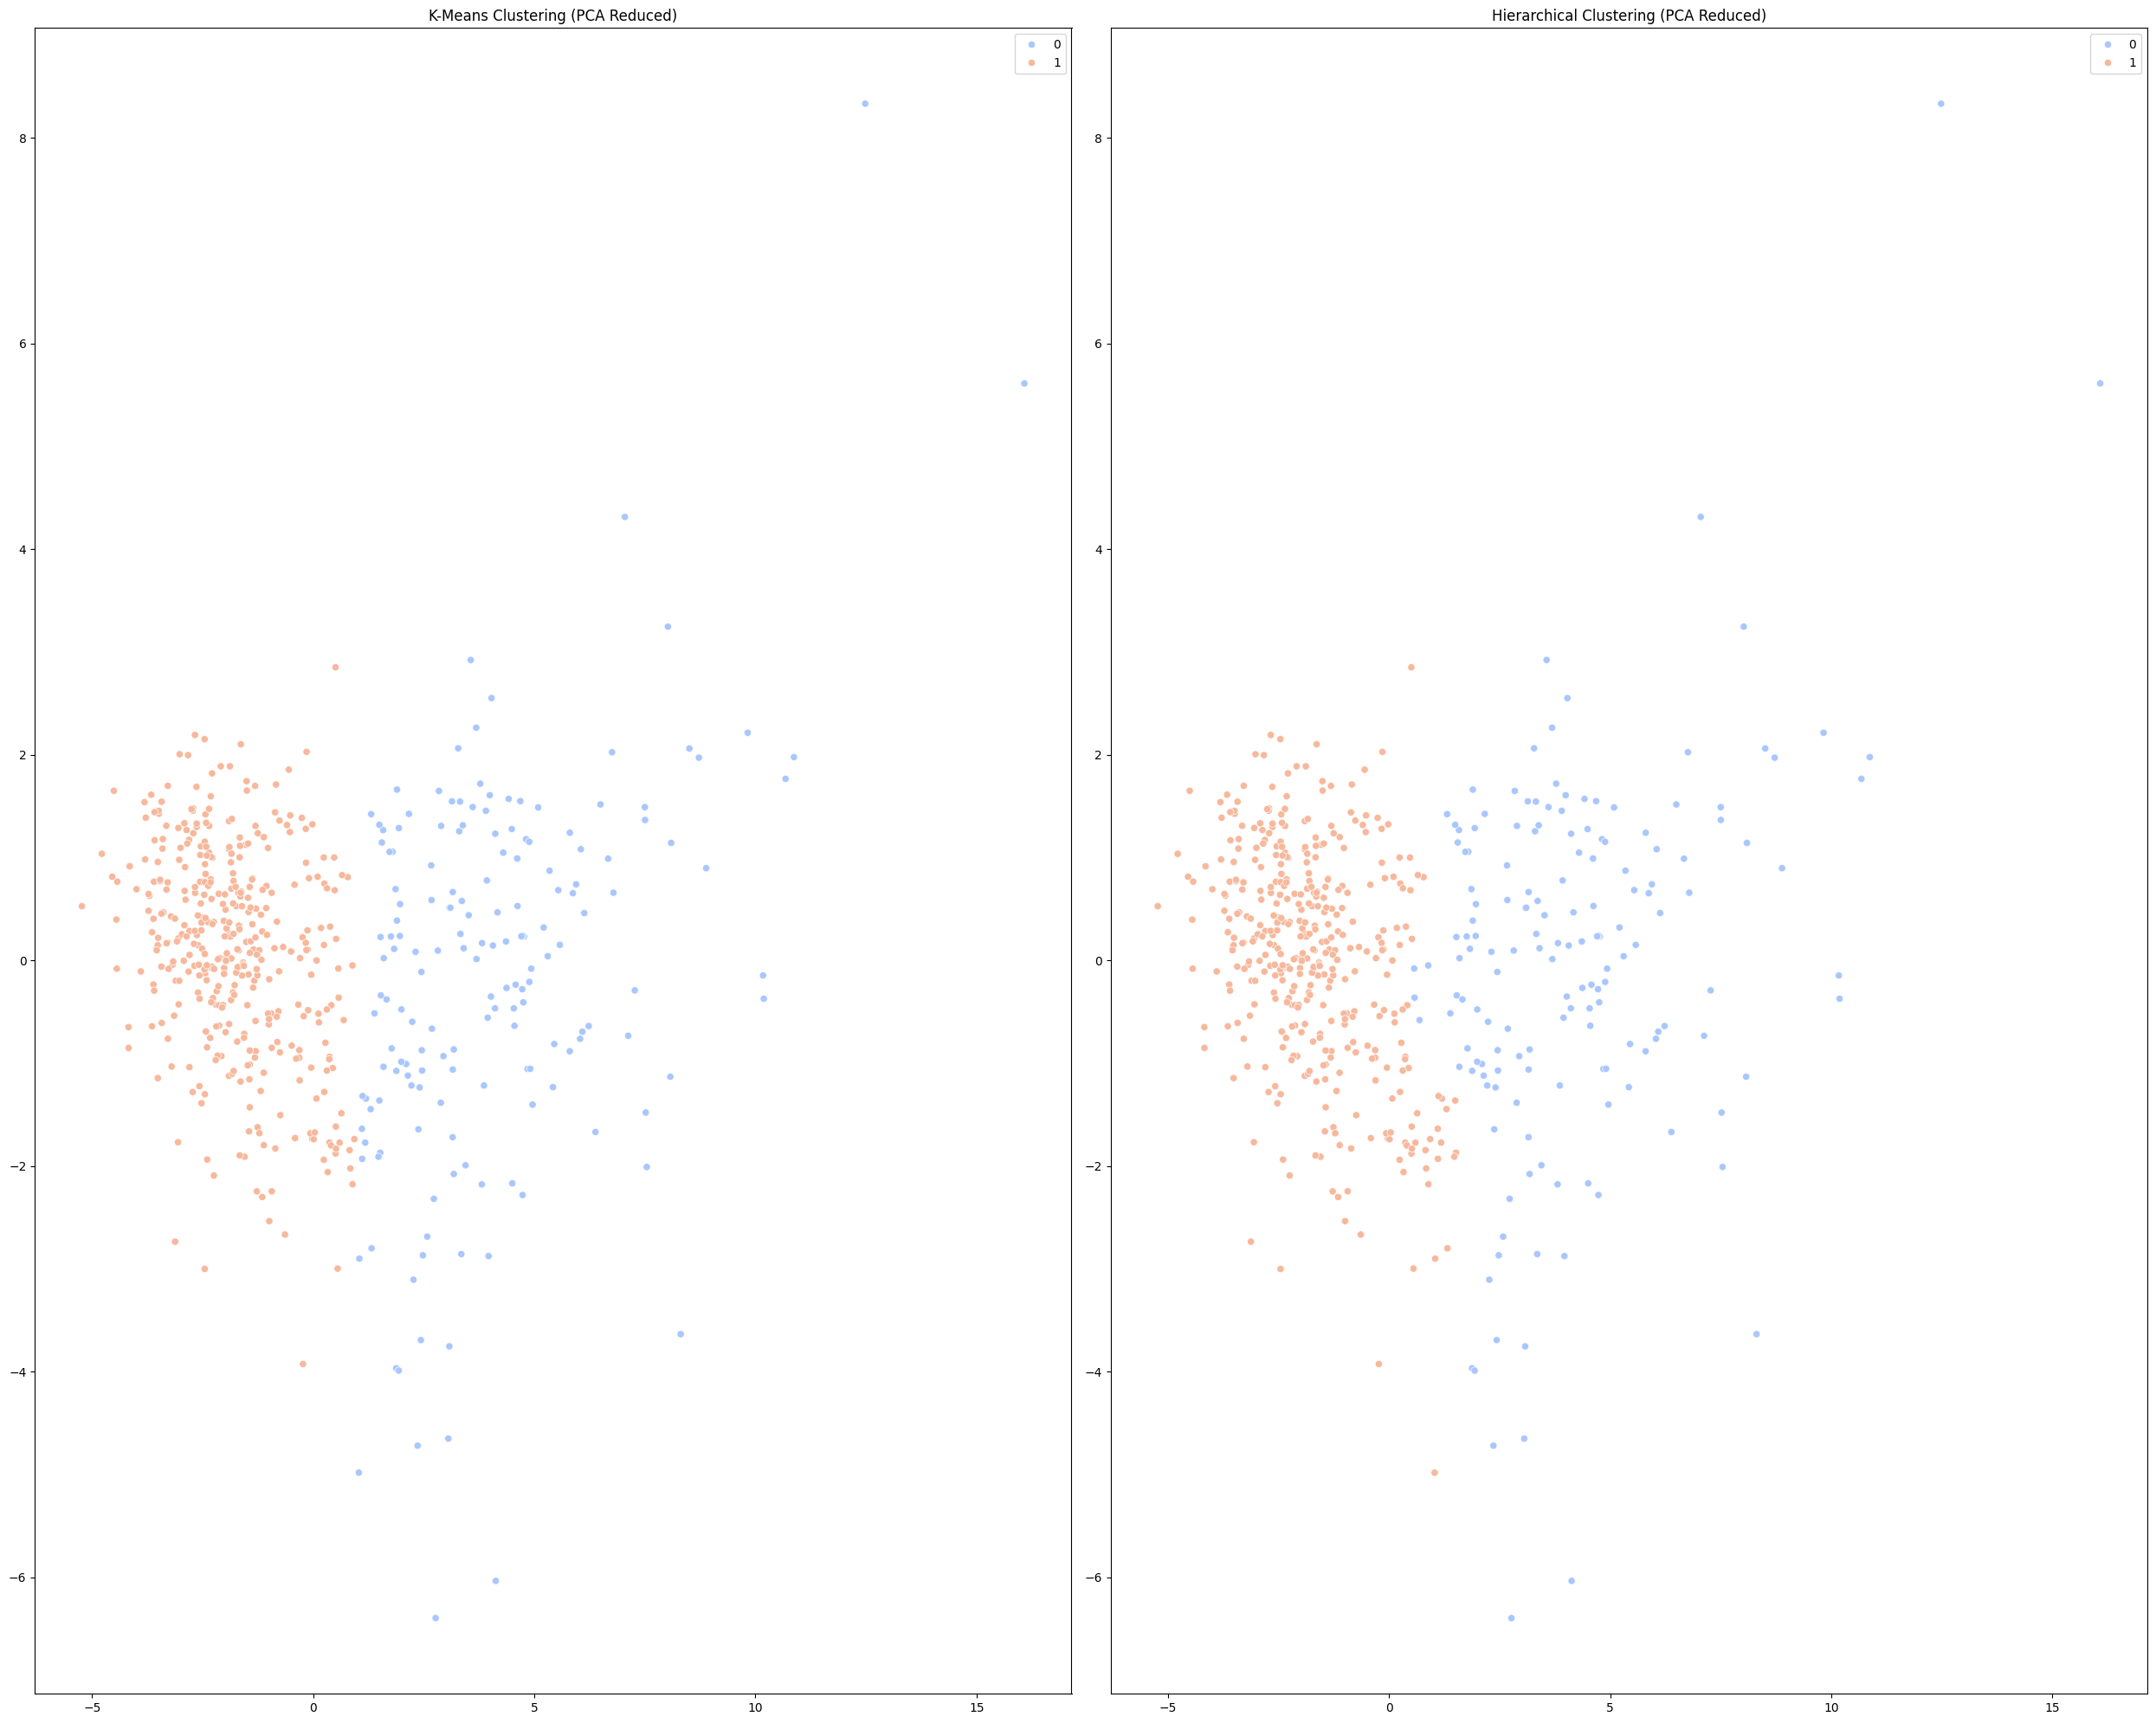

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters
plt.figure(figsize=(25,20))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_clusters, palette='coolwarm')
plt.title('K-Means Clustering (PCA Reduced)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_clusters, palette='coolwarm')
plt.title('Hierarchical Clustering (PCA Reduced)')

plt.tight_layout()
plt.show()


### Evaluate Cluster Quality

K-Means Silhouette Score: 0.5781198901108833
Hierarchical Clustering Silhouette Score: 0.5741938681950775
K-Means ARI: 0.7294680424804366
Hierarchical Clustering ARI: 0.692953298607169
K-Means NMI: 0.6617503278005055
Hierarchical Clustering NMI: 0.64164182231679


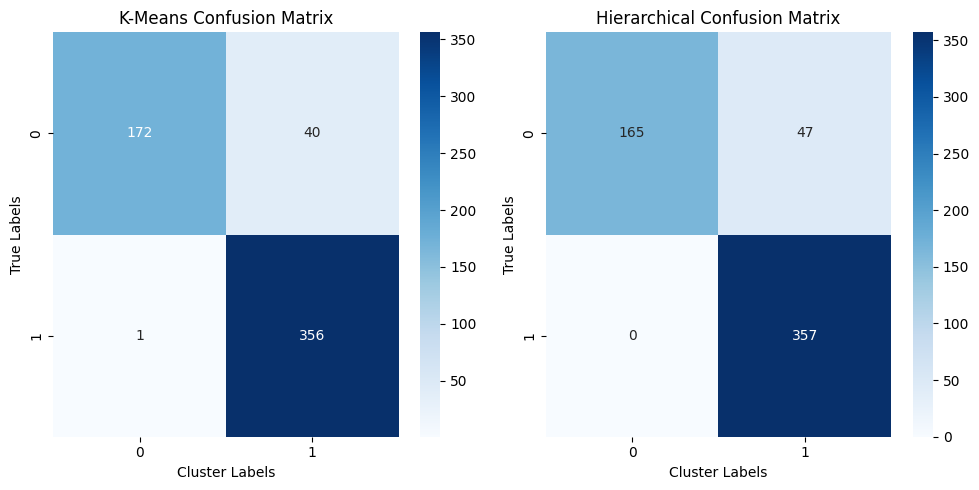

In [18]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix

# Silhouette Score
kmeans_silhouette = silhouette_score(X_pca, kmeans_clusters)
hierarchical_silhouette = silhouette_score(X_pca, hierarchical_clusters)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')

# Adjusted Rand Index (ARI)
kmeans_ari = adjusted_rand_score(true_labels, kmeans_clusters)
hierarchical_ari = adjusted_rand_score(true_labels, hierarchical_clusters)

print(f'K-Means ARI: {kmeans_ari}')
print(f'Hierarchical Clustering ARI: {hierarchical_ari}')

# Normalized Mutual Information (NMI)
kmeans_nmi = normalized_mutual_info_score(true_labels, kmeans_clusters)
hierarchical_nmi = normalized_mutual_info_score(true_labels, hierarchical_clusters)

print(f'K-Means NMI: {kmeans_nmi}')
print(f'Hierarchical Clustering NMI: {hierarchical_nmi}')

# Confusion Matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(true_labels, kmeans_clusters), annot=True, fmt='d', cmap='Blues')
plt.title('K-Means Confusion Matrix')
plt.xlabel('Cluster Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(true_labels, hierarchical_clusters), annot=True, fmt='d', cmap='Blues')
plt.title('Hierarchical Confusion Matrix')
plt.xlabel('Cluster Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


### Conclusion

To improve the separation of benign and malignant cases in my clustering analysis, I could experiment with different clustering algorithms, adjust the number of clusters, or refine feature selection. By visually inspecting the clusters and evaluating metrics like confusion matrices.






